In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from scipy.spatial.distance import euclidean as eDist

In [2]:
eDist([0,0],[1,1])

1.4142135623730951

In [12]:
np.mean([0,1])

0.5

In [2]:
image = cv2.imread("canvas-181-pothole.png")

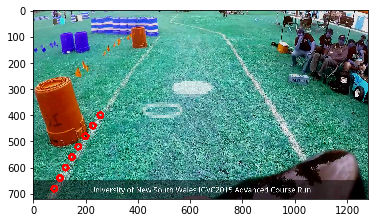

In [3]:
plt.imshow(image)

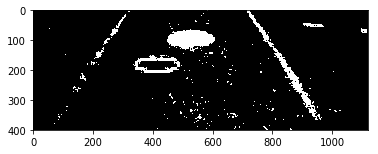

In [25]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_white = np.array([0,0,190], dtype=np.uint8)
upper_white = np.array([180, 100, 255], dtype=np.uint8)
mask = cv2.inRange(hsv, lower_white, upper_white)
mask = cv2.medianBlur(mask,5)
plt.imshow(mask[200:600,80:1200],cmap='gray')

421 247 98.2 253
359 79 81.0 1215
807 287 99.2 698
755 209 95.8 460
417 217 69.0 544
547 177 58.0 0
831 319 93.4 730
513 33 97.4 0
721 141 87.0 674
861 347 79.8 912
585 213 93.0 63
859 301 66.6 1236
393 139 70.2 175
507 123 63.4 213
891 121 88.0 0
969 289 67.6 208
457 129 67.0 412
295 143 67.8 0
453 231 74.6 95
663 65 86.8 228
591 181 69.8 41
899 245 33.6 193
787 241 86.6 691
213 23 82.2 0
555 111 44.4 16
949 239 84.0 144
775 185 65.8 845
709 113 82.0 725
817 257 73.4 1202
923 217 68.4 0
875 391 91.4 851
517 63 68.8 2954
885 167 56.8 0
497 173 51.8 76
587 397 90.4 1017
897 321 36.6 1328
397 175 24.8 434
443 181 29.0 487
273 169 66.6 0
933 293 35.2 96
735 171 76.4 459
325 111 74.6 624
563 61 60.0 1356
363 183 24.6 198
859 79 71.6 0
961 331 33.2 171
859 49 97.4 45
611 311 62.2 5587
819 219 49.2 969
761 155 52.8 830
849 271 49.6 1290
595 79 68.8 211
893 199 47.2 0
859 121 57.2 0
493 93 42.4 1416
827 69 61.4 45
559 327 36.6 3462
915 347 33.0 1336
529 333 30.8 2465
821 179 25.0 642
265 207 

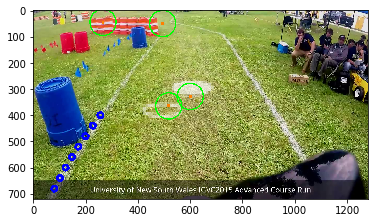

In [42]:
output = image.copy()
# circles = cv2.HoughCircles(mask, cv2.HOUGH_GRADIENT, 1, 50,param1=70,param2=30,minRadius=10,maxRadius=300)
def filterByPixel(image,x,y):
    v = 40
    h = 50
    t = 100
    patch = image[y-v:y+v,x-h:x+h]
    count = np.count_nonzero(patch)
#     print (patch.shape)
    return count 
def detect_circle(image,l,r):
    MAX_R = 100
    MIN_R = 10
    MIN_PIXEL = 2000
    DIST_threshold = 100
    # this line is the main algorithm to detect circles
#     circles = cv2.HoughCircles(image[100:700,l:r], cv2.HOUGH_GRADIENT, 1, 50,param1=70,param2=30,minRadius=10,maxRadius=300)
    circles = cv2.HoughCircles(image[200:600,80:1200], cv2.HOUGH_GRADIENT, 2, 30,param1=40,param2=30,minRadius=10,maxRadius=300)
#     print (circles)
    final_points = []
    if circles is None:
        return final_points
    # all other lines are just some filters
    centers = []
    for [x, y, r] in circles[0]:
        x=int(x)
        y = int(y)
        if r > MAX_R or r < MIN_R:
            continue
        v = filterByPixel(image,x,y)
        print (x,y,r,v)
        if  v < MIN_PIXEL:
            continue
        centers.append([x,y])
        
    # combine centers
    clusters = {}
    used_j = []
    centers.sort(key=lambda x: x[0])
    for i in range(len(centers)):
        if i in used_j:
            continue
        clusters[i] = []
        for j in range(i,len(centers)):
            dist = eDist(centers[i],centers[j])
            if dist < DIST_threshold:
                clusters[i].append(j)
                used_j.append(j)
    
    for i in clusters:
        if len(clusters[i]) > 0:
            points = list(map(lambda x:centers[x],[i]+clusters[i]))
            print (points)
            x_array = list(map(lambda x:x[0],points))
            y_array = list(map(lambda x:x[1],points))
            print (x_array)
            final_points.append([np.mean(x_array),np.mean(y_array)])
    return final_points
for [x,y] in detect_circle(mask,80,1200):
    x = int(x)
    y = int(y)
    cv2.circle(output, (x, y), 50, (0, 255, 0), 4)
    cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
#     cv2.rectangle(output, (x - 50, y - 40), (x + 50, y + 40), (200, 128, 150), -1)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

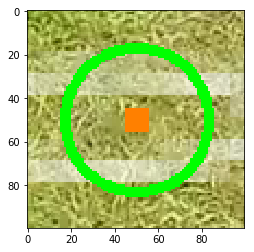

In [178]:
v = 50
h = 50
t = 100

plt.imshow(cv2.cvtColor(output[381 -v:381 +v,507 -h:507 +h,:], cv2.COLOR_BGR2RGB))